### Optimising Group Degree Generation for Bipartite Network
Here we explore the optimisation of group degree generation. The following cell focuses on comparing the execution times and CPU usage between non-optimized and optimised approaches for generating group degree sequences.

In [1]:
import time
import psutil
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

def truncated_poisson(lambda_, n, seed_value=None):
    if seed_value is not None:
        np.random.seed(seed_value)
    x = np.random.poisson(lambda_, n)
    x[x < 1] = 1
    return x.tolist()

def run_code_1(n):
    # Non-optimised Group Degree Generation
    mean_degree = 3
    ind_deg_seq = truncated_poisson(mean_degree, n)
    target_sum = np.sum(ind_deg_seq)
    # Generate a degree sequence using Poisson distribution

    # Parameters of the Group degree distribution
    mean = 4
    std_dev = 2
    lower_bound = 1
    upper_bound = np.inf

    # Generate elements from the truncated normal distribution
    #m = 1000
    a = (lower_bound - mean) / std_dev
    b = (upper_bound - mean) / std_dev
    truncated_norm = truncnorm(a, b, loc=mean, scale=std_dev)
    group_deg_seq = []
    size = 1
    while sum(group_deg_seq) < target_sum:
        value = round(truncated_norm.rvs(1)[0]) #Generate 1 element (rounded to the nearest integer) from a truncated normal distribution.
        group_deg_seq.append(value)  # Append the integer value to the list
    # Adjust the last entry to match the sum perfectly
    diff = target_sum - sum(group_deg_seq[:-1])
    group_deg_seq[-1] = diff

def run_code_2(n):
    # Optimised Group Degree Generation
    mean_degree = 3
    ind_deg_seq = truncated_poisson(mean_degree, n)
    target_sum = np.sum(ind_deg_seq)

    # Parameters of the Group degree distribution
    mean = 4
    std_dev = 2
    lower_bound = 1
    upper_bound = np.inf

    # Generate elements from the truncated normal distribution
    a = (lower_bound - mean) / std_dev
    b = (upper_bound - mean) / std_dev
    truncated_norm = truncnorm(a, b, loc=mean, scale=std_dev)
    average_number_of_group_nodes = n / mean_degree
    average_number_of_group_nodes_90_per = round(0.9 * average_number_of_group_nodes)
    group_deg_seq = truncated_norm.rvs(size=average_number_of_group_nodes_90_per).round().astype(int)
    approximate_size = int(3 * average_number_of_group_nodes)
    new_group_deg_seq = np.zeros(approximate_size, dtype=int)
    new_group_deg_seq[:len(group_deg_seq)] = group_deg_seq
    i = len(group_deg_seq)
    num_added = 0

    while np.sum(new_group_deg_seq) < target_sum:
        value = round(truncated_norm.rvs(1)[0])
        new_group_deg_seq[i] = value
        i += 1
        num_added += 1
    group_deg_seq = new_group_deg_seq[:i]
    diff = target_sum - np.sum(group_deg_seq[:-1])
    group_deg_seq[-1] = diff

n_values = [100, 500, 1000]#, 2000, 5000, 10000, 20000, 50000, 80000, 100000, 200000, 500000, 1000000, 5000000]
non_optimised_execution_times = []
optimised_execution_times = []
non_optimised_cpu_usage = []
optimised_cpu_usage = []

for n in n_values:
    print(f"Testing for n = {n}...")
    
    # Computation Time
    start_time = time.time()
    run_code_1(n)
    end_time = time.time()
    non_optimised_execution_time = end_time - start_time
    print(f"Non-optimised Group Degree Generation Execution Time: {non_optimised_execution_time:.6f} seconds")

    start_time = time.time()
    run_code_2(n)
    end_time = time.time()
    optimised_execution_time = end_time - start_time
    print(f"Optimised Group Degree Generation Execution Time: {optimised_execution_time:.6f} seconds")

    # CPU Usage
    non_optimised_cpu_usages=[]
    optimised_cpu_usages =[]
    for _ in range(1):  # Run 3 times to get average CPU usage
        start_time = time.time()
        run_code_1(n)
        end_time = time.time()
        execution_time = end_time - start_time
        cpu_usage = psutil.cpu_percent(interval=0.1)
        non_optimised_cpu_usages.append(cpu_usage)
        print(f"Non-optimised Group Degree Generation Execution Time: {execution_time:.6f} seconds | CPU Usage: {cpu_usage}%")

        start_time = time.time()
        run_code_2(n)
        end_time = time.time()
        execution_time = end_time - start_time
        cpu_usage = psutil.cpu_percent(interval=0.1)
        optimised_cpu_usages.append(cpu_usage)
        print(f"Optimised Group Degree Generation Execution Time: {execution_time:.6f} seconds | CPU Usage: {cpu_usage}%")

    # Store the collected data
    non_optimised_execution_times.append(non_optimised_execution_time)
    optimised_execution_times.append(optimised_execution_time)
    non_optimised_cpu_usage.append(np.mean(non_optimised_cpu_usages))
    optimised_cpu_usage.append(np.mean(optimised_cpu_usages))
    print("-" * 40)


Testing for n = 100...
Non-optimised Group Degree Generation Execution Time: 0.011417 seconds
Optimised Group Degree Generation Execution Time: 0.006576 seconds
Non-optimised Group Degree Generation Execution Time: 0.010458 seconds | CPU Usage: 6.1%
Optimised Group Degree Generation Execution Time: 0.010769 seconds | CPU Usage: 17.1%
----------------------------------------
Testing for n = 500...
Non-optimised Group Degree Generation Execution Time: 0.091854 seconds
Optimised Group Degree Generation Execution Time: 0.029267 seconds
Non-optimised Group Degree Generation Execution Time: 0.055721 seconds | CPU Usage: 23.5%
Optimised Group Degree Generation Execution Time: 0.041129 seconds | CPU Usage: 0.0%
----------------------------------------
Testing for n = 1000...
Non-optimised Group Degree Generation Execution Time: 0.147671 seconds
Optimised Group Degree Generation Execution Time: 0.063309 seconds
Non-optimised Group Degree Generation Execution Time: 0.106512 seconds | CPU Usage: 

In [23]:
import pandas as pd
# Define the file name
csv_filename = "Group_Degree_Generation_time.csv"

# Create a DataFrame
data = {
    "n_values": n_values,
    "non_optimised_execution_times": non_optimised_execution_times,
    "optimised_execution_times": optimised_execution_times
}

df = pd.DataFrame(data)

df.to_csv(csv_filename, index=False)

print(f"Data has been saved to {csv_filename}")
df[9:]

Data has been saved to Group_Degree_Generation_time.csv


,n_values,non_optimised_execution_times,optimised_execution_times
9,100000,20.893214,7.769048
10,200000,61.609800,18.609764
11,500000,304.301793,70.122408
12,1000000,1110.514002,219.356949
13,5000000,25673.655992,4285.199724


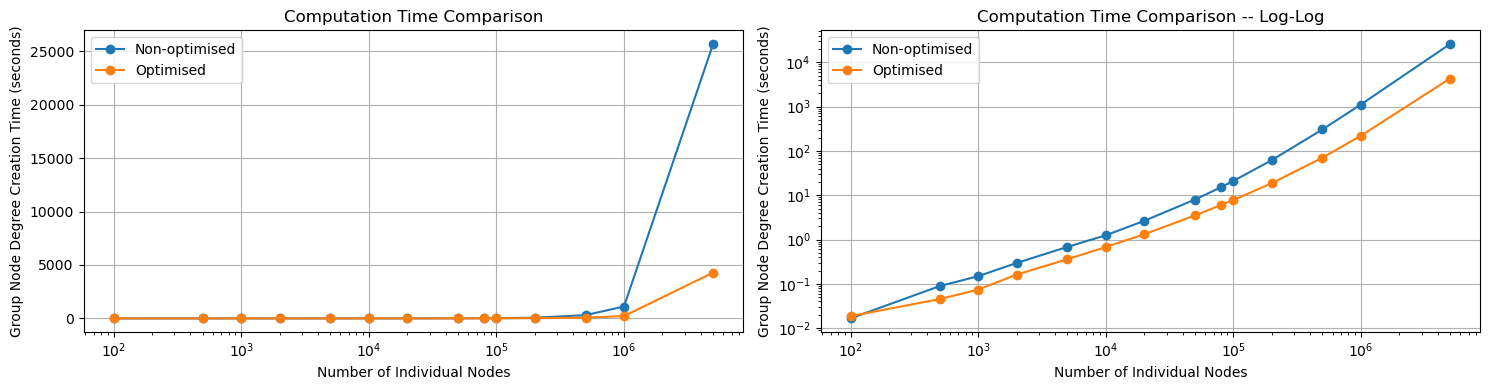

In [19]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1) 
plt.plot(n_values, non_optimised_execution_times, marker='o', label='Non-optimised')
plt.plot(n_values, optimised_execution_times, marker='o', label='Optimised')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Number of Individual Nodes')
plt.ylabel('Group Node Degree Creation Time (seconds)')
plt.title('Computation Time Comparison')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2) 
plt.plot(n_values, non_optimised_execution_times, marker='o', label='Non-optimised')
plt.plot(n_values, optimised_execution_times, marker='o', label='Optimised')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Individual Nodes')
plt.ylabel('Group Node Degree Creation Time (seconds)')
plt.title('Computation Time Comparison -- Log-Log')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()